# Final Exam

November 20, 2020

##### (1)  You decide to determine how much time to put in on the exam by rolling a die (this time a six-sided one).  The number of hours that you spend on the exam is equal to the number of trials required to get the second four.  On the average how many hours can you expect to spend on the exam?  If all thirteen people in class went through the exercise, what would you expect the variance of their scores to be?  What would the standard error of their mean be?

In [69]:
die = c(1, 2, 3, 4, 5, 6)

In [71]:
roll = sample(die, size=1, replace=TRUE)
roll

[1] 4

In [87]:
roll_two_fours = function(){
    die = c(1, 2, 3, 4, 5, 6)
    fours = 0
    loops = 0
    num_games = 10
    hours = rep(0, num_games)

    i = 1
    while (i == 1) {
        roll = sample(die, size=1, replace=TRUE)
        if (roll == 4) {fours = fours + 1}
        loops = loops + 1

        if (fours == 2){i = 0}
    }
    return(loops)
}

In [97]:
num_games = 100000
hours = rep(0, num_games)

for (i in 1:num_games){
    x = roll_two_fours()
    hours[i] = x
}

In [113]:
#sample 13 students 10000 times from the 100,000 runs above
num_students = 13
num_samples = 10000
samp_means = rep(0, num_samples)
samp_variances = rep(0, num_samples)
samp_stderrs = rep(0, num_samples)

for (p in 1:num_samples){
    students = sample(hours, size = num_students, replace=TRUE)
    samp_means[p] = mean(students)
    samp_variances[p]=var(students)
    samp_stderrs[p] = sd(students) / sqrt(length(students))
    
}

In [120]:
library('psych')
describe(hours)
var(hours)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,1e+05,12.01589,7.790004,10,11.00992,5.9304,2,85,83,1.441745,3.131491,0.02463416


[1] 60.68416

In [114]:
mean(samp_means)

[1] 12.03094

In [115]:
mean(samp_variances)

[1] 60.81651

In [116]:
mean(samp_stderrs)

[1] 2.072523

I can expect to spend 12 hours on the exam. To answer this, I ran a simulation where I choose randomly from numbers 1-6 until I draw 2 fours. I ran this simulation 100,000 times and found it took 12 hours on average with variance 60.7 and standard error 0.02. I then sampled 13 'students' from this set of 100,000 simulations to calculate sample means, variances, and standard errors of the mean. I repeated that process 10,000 times to find that on average the mean is 12, the variance is 60, and the standard error of the mean is 2.07.

##### (2) Your kid sister was stopped at the Canadian border trying to reenter the US.  She was given a screening test used to detect possible terrorists.  The test correctly detects a true terrorist about 88% of the time but also incorrectly labels about 3% of non-terrorists as terrorists.  According to the last available immigration and customs data, roughly 200,000 people enter US from Canada every day.  According to one estimate, 8 known terrorists entered from Canada last year (and maybe 10 times that many unknown terrorists).  The test came up positive for your sister.  Given that positive result, what is the probability that your sister is a terrorist?   (Please ignore any inside knowledge you have about your kid sister.)

In [132]:
# A = being a terrorist
# B = positive test result 
#P(A|B) = P(A)*P(B|A) / P(B)

#probability of being a terrorist P(A)
p_terror = 88 / ((200000*365) - 88)
paste('p_terror: ', p_terror)

#probability of a positive test, regardless of terrorist value P(B)
num_terrorists = 88
num_non_terrorists = (200000*365) - 88
num_positive = (.88 * num_terrorists) + (.03 * num_non_terrorists)
p_positive = num_positive / (200000*365)
paste('p_positive: ', p_positive)

#probability of positive test given terrorist P(B|A)
p_positive_terror = 0.88
paste('p_positive_terror: ', p_positive_terror)

#probability that terrorist given a positive test P(A|B)
p_terror_positive = (p_terror * p_positive_terror) / p_positive
paste('p_terror_positive: ', p_terror_positive)


[1] "p_terror:  1.20548090523726e-06"

[1] "p_positive:  0.0300010246575342"

[1] "p_positive_terror:  0.88"

[1] "p_terror_positive:  3.53595655054527e-05"

Because the base rate of being a terrorist is so low, the probability of being a terrorist given a positive test is also extremely low. Using bayes rule, I calculated the probability of being a terrorist (.0000012), multiplied it by the probability of a positive test regardless of if a person is a terrorist (0.030001), and divided by the probability of a positive test given the person is actually a terrorist (0.88). This gives the probability of being a terrorist given a positive test, which is 0.000035.

##### (3) An investigator was interested in recall of product placement as a function of gender and genre.  She believed that men would have better recall and that action would yield the best recall followed by comedy and lastly drama.   Was she correct?   If gender wassn’t significant, how many subjects would she need to run to have an 80% chance of finding it significant assuming the means and variances stay about the same.  The data are in movies.csv.

In [2]:
mov = read.csv('data_files/movies.csv')

In [44]:
head(mov)
dim(mov)

gender,genre,recall
female,action,1
female,action,1
female,action,1
female,action,1
female,action,2
female,action,2


[1] 137   3

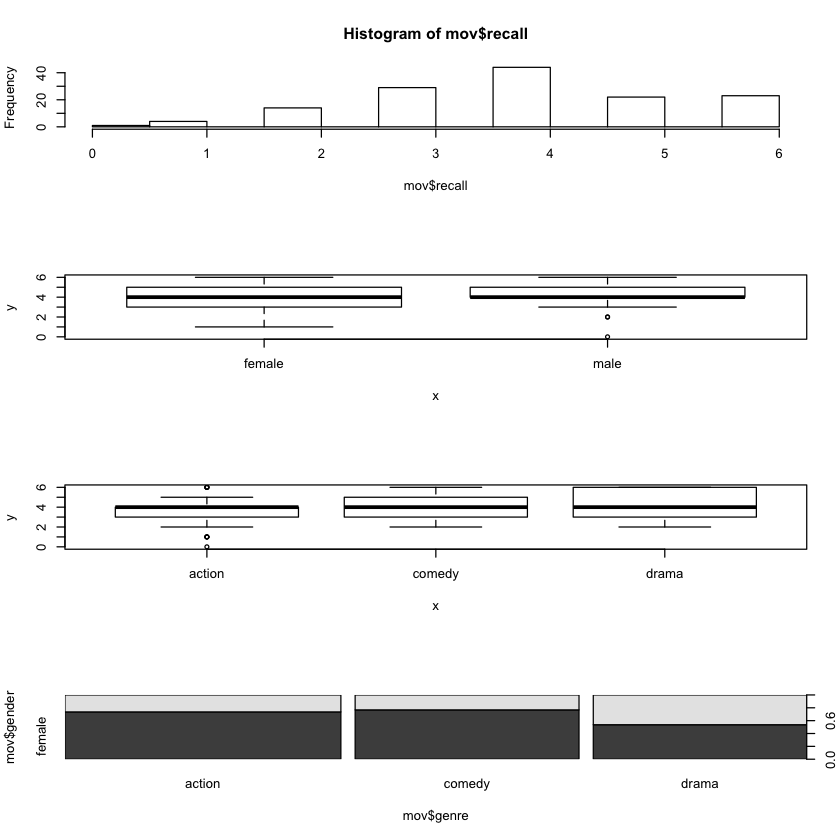

In [21]:
# take a look at univariate distributions
par(mfrow=c(4,1))
hist(mov$recall)
plot(mov$gender,mov$recall)
plot(mov$genre, mov$recall)
plot(mov$gender~mov$genre)

First of all, the histogram of recall shows an approximately normal distribution. From the plots, it looks like there may be a slight difference in recall between genders, and that there may also be a slight difference between the genres as well. I will test both with linear contrasts. I'll also include both predictors in a single linear model to check for significance. Further, it looks like the number of males and females in each genre is not equal, with action and comedy having more females than males. For this reason I will include both as predictors.

In [5]:
mov$gender = as.factor(mov$gender)
mov$genre = as.factor(mov$genre)

#### Linear Models

In [15]:
# create a linear model with recall as dv and gender as ids
lm_1 = lm(recall~gender, data=mov)
summary(lm_1)


Call:
lm(formula = recall ~ gender, data = mov)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3023 -0.8085  0.1915  1.1915  2.1915 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.8085     0.1386  27.487   <2e-16 ***
gendermale    0.4938     0.2473   1.997   0.0479 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.343 on 135 degrees of freedom
Multiple R-squared:  0.02868,	Adjusted R-squared:  0.02149 
F-statistic: 3.987 on 1 and 135 DF,  p-value: 0.04787


As suspected, gender does have a barely significant effect on its own. But I want to see if this is true when controlling for genre.

In [115]:
# create a linear model with recall as dv and gender and genre as ids
lm_1 = lm(recall ~ gender + genre, data=mov)
summary(lm_1)


Call:
lm(formula = recall ~ gender + genre, data = mov)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8946 -0.9081  0.0919  1.0919  2.5006 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.06912    0.12206  33.336   <2e-16 ***
gendercon_male  0.19759    0.12443   1.588   0.1147    
genrecon_genre  0.35386    0.13958   2.535   0.0124 *  
genre          -0.04478    0.20084  -0.223   0.8239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.321 on 133 degrees of freedom
Multiple R-squared:  0.07488,	Adjusted R-squared:  0.05401 
F-statistic: 3.588 on 3 and 133 DF,  p-value: 0.01552


From this model it appears that when controling for genre, there actually is no significant effect of gender on recall. I fail to reject the null hypothesis of no difference between genders.

#### Linear Contrasts

In [25]:
#Hypothesis: Men have better recall than women
con_male = c(-1, 1)
contrasts(mov$gender) = cbind(con_male)

#Hypothesis: Action best recall, then comedy, then drama
con_genre = c(1, 0, -1)
contrasts(mov$genre) = cbind(con_genre)

# include both contrasts in a linear model to test hypotheses
con_model = lm(recall ~ gender * genre, data = mov)
summary(con_model)


Call:
lm(formula = recall ~ gender * genre, data = mov)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7857 -0.8788  0.1212  1.1212  2.4615 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    4.06939    0.12644  32.184   <2e-16 ***
gendercon_male                 0.20304    0.12644   1.606   0.1107    
genrecon_genre                -0.37231    0.14687  -2.535   0.0124 *  
genre                         -0.08573    0.22975  -0.373   0.7096    
gendercon_male:genrecon_genre -0.05063    0.14687  -0.345   0.7309    
gendercon_male:genre          -0.07051    0.22975  -0.307   0.7594    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.33 on 131 degrees of freedom
Multiple R-squared:  0.07639,	Adjusted R-squared:  0.04113 
F-statistic: 2.167 on 5 and 131 DF,  p-value: 0.0616


From this model, we fail to confirm the hypothesis that men have better recall than women. This linear contrast is not significant when predicting recall while controlling for genre. However, there is a significant effect (p=0.0124) of the linear contrast predicting that action has the highest recall followed by comedy and drama. However, the beta estimate for this contast is negative. So it appears that actually drama has the highest recall, followed by comedy and then action, the opposite of the original hypothesis.

#### Power Analysis: how many subjects would she need to run to have an 80% chance of finding it significant assuming the means and variances stay about the same

In [58]:
# compute effect size, assume it is inflated by 25%
library(effectsize)
library(pwr)

cd = cohens_d(recall~gender, data=mov)
pwr.t.test(d=cd$Cohens_d*0.75,n=, power=0.8, sig.level=0.05,type="two.sample",alternative="two.sided")


     Two-sample t test power calculation 

              n = 207.4885
              d = 0.2756978
      sig.level = 0.05
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


If the effect size found in this study is inflated bt 25%, then the number of subjects she would have needed to run in order to have 80% power with alpha = .05 is 207.

##### (4)  I helped administer the biannual CDC survey on high school students in NH over several offerings in the early 2000s.  Many of the questions had to do with risky behaviors.  I’m enclosing a data file “school_fighting.csv” that contains three variables from one of those administrations.  The variable, amtfight, is the number of fights that year by each person.  We expected that boys would fight more than girls and we expected a linear decrease over years.  Years by the way are 9th through 12th.  Female = 1. 

In [61]:
fight = read.csv('data_files/school_fighting.csv')

In [62]:
head(fight)
dim(fight)

gender,grade,fights
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0


[1] 15335     3

In [71]:
fight$gender = as.factor(fight$gender)
fight$grade = as.factor(fight$grade)

[1] "integer"

In [83]:
aggregate(fights~grade, fight, mean)
aggregate(fights~grade, fight, var)

grade,fights
1,0.2915210
2,0.2335442
3,0.1886954
4,0.1623703


grade,fights
1,0.8177292
2,0.6940385
3,0.6340012
4,0.5406063


gender,fights
1,0.1127829
2,0.3439608


gender,fights
1,0.2960887
2,1.0674387


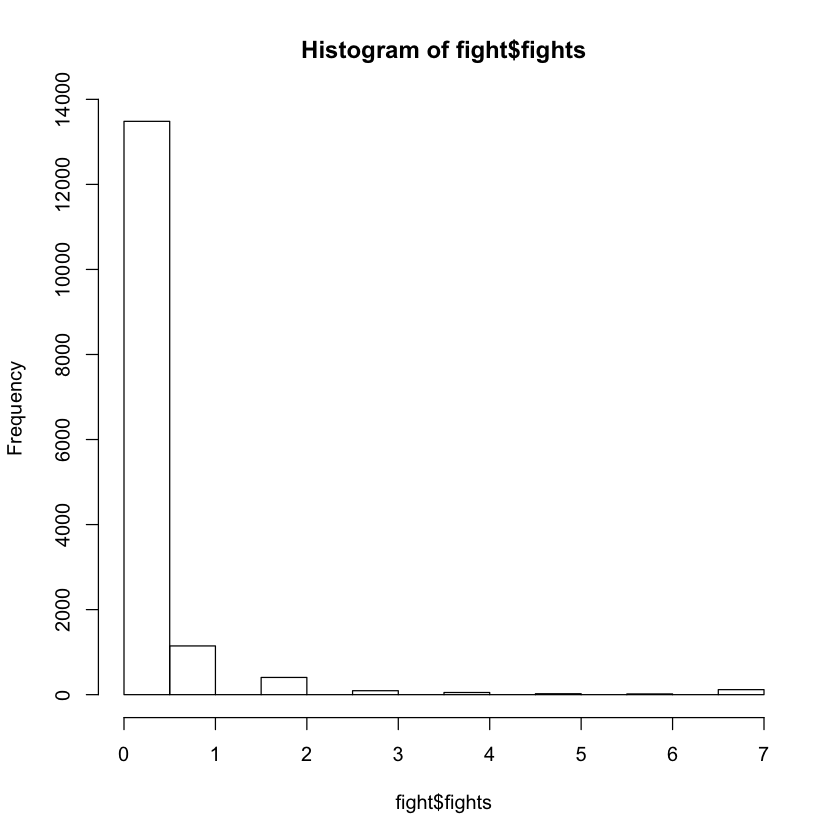

In [75]:
aggregate(fights~gender, fight, mean)
aggregate(fights~gender, fight, var)
hist(fight$fights)

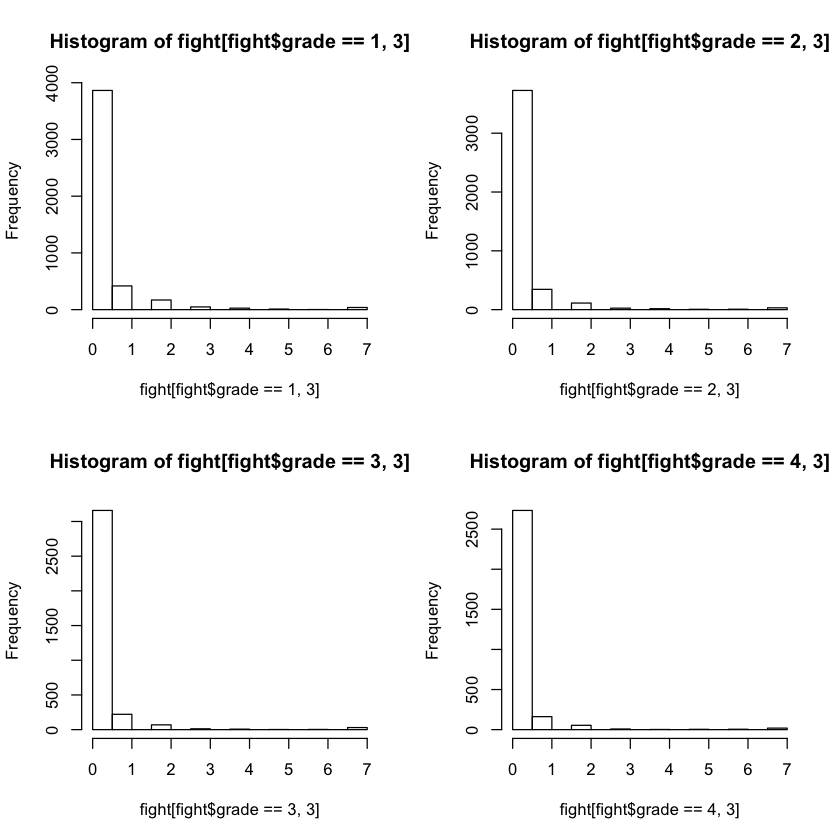

In [111]:
par(mfrow=c(2,2))
hist(fight[fight$grade == 1,3])
hist(fight[fight$grade == 2,3])
hist(fight[fight$grade == 3,3])
hist(fight[fight$grade == 4,3])

We can see that the number of fights is quite skewed, with most people having 0 fights, and a small number having between 1 and 7 fights. However, the means and variances are not equal across genders or across grades, so I will use a negative binomial distribution in the glm instead of a poisson distribution.

In [80]:
# fit glm for negative binomial distributions
library(MASS)
nb = glm.nb(fights~gender + grade, data=fight)
summary(nb)


Call:
glm.nb(formula = fights ~ gender + grade, data = fight, init.theta = 0.1502943558, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6519  -0.5640  -0.4546  -0.3754   3.7356  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.90620    0.05916 -32.223  < 2e-16 ***
gender2      1.14597    0.05765  19.877  < 2e-16 ***
grade2      -0.27526    0.07134  -3.858 0.000114 ***
grade3      -0.50300    0.07785  -6.461 1.04e-10 ***
grade4      -0.67244    0.08383  -8.021 1.05e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.1503) family taken to be 1)

    Null deviance: 5908.4  on 15334  degrees of freedom
Residual deviance: 5436.9  on 15330  degrees of freedom
AIC: 15547

Number of Fisher Scoring iterations: 1


              Theta:  0.15029 
          Std. Err.:  0.00617 

 2 x log-likelihood:  -15535.21100 

In [84]:
# compare against poisson just for fun
poisson = glm(fights~gender+grade, data = fight,  family = poisson())
summary(poisson)


Call:
glm(formula = fights ~ gender + grade, family = poisson(), data = fight)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9423  -0.7600  -0.5391  -0.4348   6.9840  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.92888    0.03997 -48.263  < 2e-16 ***
gender2      1.11694    0.03905  28.602  < 2e-16 ***
grade2      -0.22946    0.04186  -5.481 4.23e-08 ***
grade3      -0.43007    0.04757  -9.042  < 2e-16 ***
grade4      -0.59779    0.05302 -11.274  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 16555  on 15334  degrees of freedom
Residual deviance: 15447  on 15330  degrees of freedom
AIC: 19840

Number of Fisher Scoring iterations: 6


The AIC of the model using the negative binomial has a much lower AIC than that of the poisson, giving more evidence that this was the correct distribution to use. This model shows that males fight significantly more (beta estimate = 1.12) than females. This is true even controlling for grade. Further, grade2, grade3, and grade 4 are all significant with very small p values (p=4.2e-08 or smaller). This suggests that the hypothesis that increasing grade linearly reduces fights is correct. I will do a linear contrast on grade to further check this hypothesis.

In [101]:
con_grade = c(-3, -1, 1, 3)
contrasts(fight$grade) = cbind(con_grade)
nb = glm.nb(fights~gender + grade, data=fight)
summary(nb)


Call:
glm.nb(formula = fights ~ gender + grade, data = fight, init.theta = 0.1502943558, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6519  -0.5640  -0.4546  -0.3754   3.7356  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -2.26888    0.04608 -49.242   <2e-16 ***
gender2         1.14597    0.05765  19.877   <2e-16 ***
gradecon_grade -0.11225    0.01320  -8.501   <2e-16 ***
grade          -0.02174    0.06074  -0.358    0.720    
grade           0.04830    0.05439   0.888    0.375    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.1503) family taken to be 1)

    Null deviance: 5908.4  on 15334  degrees of freedom
Residual deviance: 5436.9  on 15330  degrees of freedom
AIC: 15547

Number of Fisher Scoring iterations: 1


              Theta:  0.15029 
          Std. Err.:  0.00617 

 2 x log-likelihood:  -15535.21100 

The linear contrast shows a significant linear effect of grade on number of fights, further confirming the hypothesis that the number of fights decreases with grade.

##### (5) You want to carry out an experiment comparing amygdala activation to negative stimuli versus positive stimuli.   You have 4 positive stimuli and 4 negative ones.  You plan to run a block design fMRI   in which present a block with all 4 + stimuli or all 4 - stimuli in a block.  You plan to alternate + and - blocks.  You want to present the positive stimuli in all possible orders across blocks and the negative stimuli in all possible orders across blocks.  How many trials (blocks) do you need to accomplish the above?

Number of orders of pos and neg separately = 4! = 24 for each. Block pos can go first or neg can go first so x2.
To pair each pos combination with each neg combination we multiply 24 * 24 = 576*2 = 1152